
# CRIM Intervals:  Melodic and Harmonic

### What You Can Do with this Notebook:

* Show all **melodic** and **harmonic** intervals (diatonic, chromatic, and zero-based) in a piece
* Render charts of intervals
* Show **ngrams** of these melodic and harmonic intervals in a given piece
* Search for **ngrams** in one piece or a whole corpus of them

### Reminders:

#### Import Music Files

* If you are exploring pieces from CRIM, importing simply involves providing the CRIM URL of the MEI file:  
    * **`piece = importScore('https://crimproject.org/mei/CRIM_Model_0008.mei')`**

* But you can also use the Notebook with any MEI, MusicXML, or MIDI file of your own. You can easily do this when you run the Notebooks on Jupyter Hub, you will also find a folder called **`Music_Files`**.  Upload the file here, then provide the path to that file: 
    * **`piece = importScore('Music_Files/My_File_Name.mei')`**.  

#### Save outputs as CSV or Excel

* The Jupyter Hub version of these Notebooks also provides a folder called **`saved_csv`**.  You can save **csv** files of any data frame there with this command: 
    * **`notebook_data_frame_name.to_csv('saved_csv/your_file_title.csv')`**.
* If you prefer **Excel** documents (which are better for anything with a complex set of columns or hierarhical index), use **ExcelWriter**.  In the following code, you will need to provide these commands:
    * **`writer = pd.ExcelWriter('saved_csv/file_name.xlsx', engine='xlsxwriter')`**
* Now convert your dataframe to Excel
    * **`frame_name.to_excel(writer, sheet_name='Sheet1')`**
* And finally save the new file to the folder here in the Notebook:
    * **`writer.save()`**

Put the following code to a new cell and update the frame_name and file_name:

`writer = pd.ExcelWriter('saved_csv/file_name.xlsx', engine='xlsxwriter')` <br>
`frame_name.to_excel(writer, sheet_name='Sheet1')` <br>
`writer.save()` <br>

#### Read Documentation for Each Method
- Read the documentation with this command ```print(ImportedPiece.YourMethod.__doc__)```, where you will replace ```'YourMethod'``` with the name of the individual method, for example ```print(ImportedPiece.melodic.__doc__)```.


*** 

## A. Import Intervals and Other Code

* The first step is to import all the code required for the Notebook
* **`arrow/run`** or **`Shift + Enter`** in the following cell:

In [22]:
import intervals
from intervals import * 
from intervals import main_objs
import intervals.visualizations as viz
import pandas as pd
import re
import altair as alt
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact
from pandas.io.json import json_normalize
from pyvis.network import Network
from IPython.display import display
import requests
import os
import glob as glob


MYDIR = ("saved_csv")
CHECK_FOLDER = os.path.isdir(MYDIR)

# If folder doesn't exist, then create it.
if not CHECK_FOLDER:
    os.makedirs(MYDIR)
    print("created folder : ", MYDIR)

else:
    print(MYDIR, "folder already exists.")
    
MUSDIR = ("Music_Files")
CHECK_FOLDER = os.path.isdir(MUSDIR)

# If folder doesn't exist, then create it.
if not CHECK_FOLDER:
    os.makedirs(MUSDIR)
    print("created folder : ", MUSDIR)

else:
    print(MUSDIR, "folder already exists.")

saved_csv folder already exists.
Music_Files folder already exists.


## B. Importing a Piece

### B.1 Import a Piece

In [2]:
# Select a prefix:

# prefix = 'Music_Files/'
prefix = 'https://crimproject.org/mei/'
# Add your filename here

mei_file = 'CRIM_Model_0001.mei'

url = prefix + mei_file

piece = importScore(url)

print(piece.metadata)


Successfully imported https://crimproject.org/mei/CRIM_Model_0001.mei
{'title': 'Veni speciosam', 'composer': 'Johannes Lupi'}


## C. Melodic Patterns

** CRIM Intervals, as the name suggests, can tell us a lot about the **distances between notes**

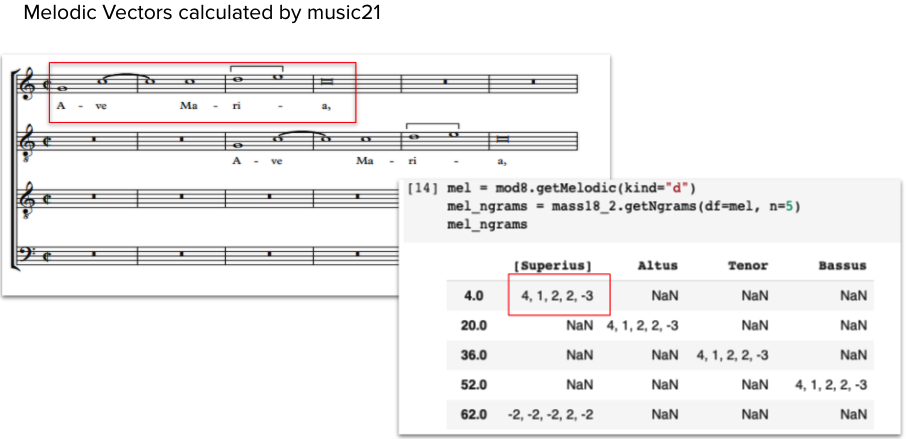


### C.1 Get the melodic intervals for each voice

* **`piece.melodic(kind="d")`** is the basic method to find any type of melodic interval

* Note that **`kind`** is a variable--you can change it, then run the cell to see the results.
<br>

* **`q`** = **diatonic with 'quality'** (thus distinguishing between P8, M3, and m3 intervals)
* **`d`** = **diatonic without quality** (just the interval:  8, 3)
* **`c`** = **chromatic** (here a unison will be **0**, and a tritone will be **6**)
* **`z`** = **zero-based** (diatonic, but with unison is represented as "0")
<br>
    
* compound intervals?
    * add **`compound=True`** to see 10ths and 3rds as different; **`compound=False`** for them to be the same.  
    * For example:  **`piece.melodic(kind="d", compound=True).fillna('-')`**
    
* no unisons?

    * adding **`combineUnisons=True`** to the request for `piece.notes()` will combine all unisons to a single note.  The total duration will be the same as for the individual notes, but now getMelodic (and getNgrams) will follow the contour of the melody as if there were no repeated note
    * For example:  **`piece.melodic(kind="d", combineUnisons=True)`**
    
* Read the Documentation:  `print(ImportedPiece.melodic.__doc__)`
    

In [3]:
# Read the Documentation:  
print(ImportedPiece.melodic.__doc__)


        Return melodic intervals for all voice pairs. Each melodic interval
        is associated with the starting offset of the second note in the
        interval. To associate intervals with the offset of the first notes,
        pass end=False. If you want melodic intervals measured at a regular
        duration, do not pipe this method's result to the `regularize` method.
        Instead, pass the desired regular durational interval as an integer or
        float as the `unit` parameter.

        :param str kind: use "q" (default) for diatonic intervals with quality,
            "d" for diatonic intervals without quality, "z" for zero-indexed
            diatonic intervals without quality (i.e. unison = 0, second = 1,
            etc.), or "c" for chromatic intervals. Only the first character is
            used, and it's case insensitive.
        :param bool directed: defaults to True which shows that the voice that
            is lower on the staff is a higher pitch than the v

In [4]:
mel = piece.melodic(kind='d')
mel.head(5)

,Superius,Contratenor,PrimusTenor,SecundusTenor,Bassus
0.0,NaN,Rest,Rest,Rest,Rest
4.0,5,NaN,NaN,NaN,NaN
8.0,NaN,Rest,Rest,Rest,Rest
10.0,-2,NaN,NaN,NaN,NaN
12.0,2,NaN,NaN,NaN,NaN


In [5]:
mel = piece.melodic(kind="d").fillna('-')
mel.head(5)


,Superius,Contratenor,PrimusTenor,SecundusTenor,Bassus
0.0,-,Rest,Rest,Rest,Rest
4.0,5,-,-,-,-
8.0,-,Rest,Rest,Rest,Rest
10.0,-2,-,-,-,-
12.0,2,-,-,-,-


### C.2  Counting Intervals (and other operations)

* The Pandas library includes a vast array of standard methods for working with data frames (renaming columns, sorting data, counting categories, etc).  You can read just a few of the basic ones here:  **https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf**

<br>

* Using our dataframe of notes+rests (**`nr`**), you can experiment with a few (try them out below):

    * **count the number of rows** (which tells us simply how large the dataframe is):  **`nr.count`**
    * **rename a columns**:  **`nr.rename(columns = {'[Superius]':'Cantus'})`**
    * **stack all the columns** on top of each other to get one list of all the notes:  **`nr.stack()`**
    * **stack and count the number of unique values** (which will tell us how many different tones are in this piece): **`nr.stack().nunique()`**
    * **count the number of each note in each part**:  **`nr.apply(pd.Series.value_counts).fillna(0).astype(int)`**
    * **count and sort** the number of notes in a single voice part:  **`nr.apply(pd.Series.value_counts).fillna(0).astype(int).sort_values("[Superius]", ascending=False)`**

In [6]:
# Sort All Intervals by Size and Direction, with counts for each voice

int_order = ["P1", "m2", "M2", "m3", "M3", "P4", "P5", "m6", "M6", "m7", "M7", "P8",
             "-m2", "-M2", "-m3", "-M3", "-P4", "-P5", "-m6", "-M6", "-m7", "-M7", "-P8"]
mel = piece.melodic()
mel = mel.fillna("-")

# count up the values in each item column--sum for each pitch.  
# make a copy to be sure we don't mess up
mel = mel.apply(pd.Series.value_counts).fillna(0).astype(int).reset_index().copy()

# rename the index column to something more useful
mel.rename(columns = {'index':'interval'}, inplace = True)

# apply the categorical list and sort
mel['interval'] = pd.Categorical(mel["interval"], categories=int_order)
mel = mel.sort_values(by = "interval").dropna().copy()
mel.reset_index()

,index,interval,Superius,Contratenor,PrimusTenor,SecundusTenor,Bassus
0,10,P1,20,20,16,14,9
1,15,m2,38,48,29,35,23
2,8,M2,66,95,72,78,67
3,16,m3,20,14,14,13,9
4,9,M3,4,3,3,1,0
5,11,P4,9,14,15,9,8
6,12,P5,8,8,7,11,15
7,17,m6,1,0,0,2,0
8,13,P8,0,0,0,1,1
9,6,-m2,55,54,38,37,29


### Chart of Intervals in Each Voice


title : Veni speciosam
composer : Johannes Lupi


<AxesSubplot:xlabel='interval'>

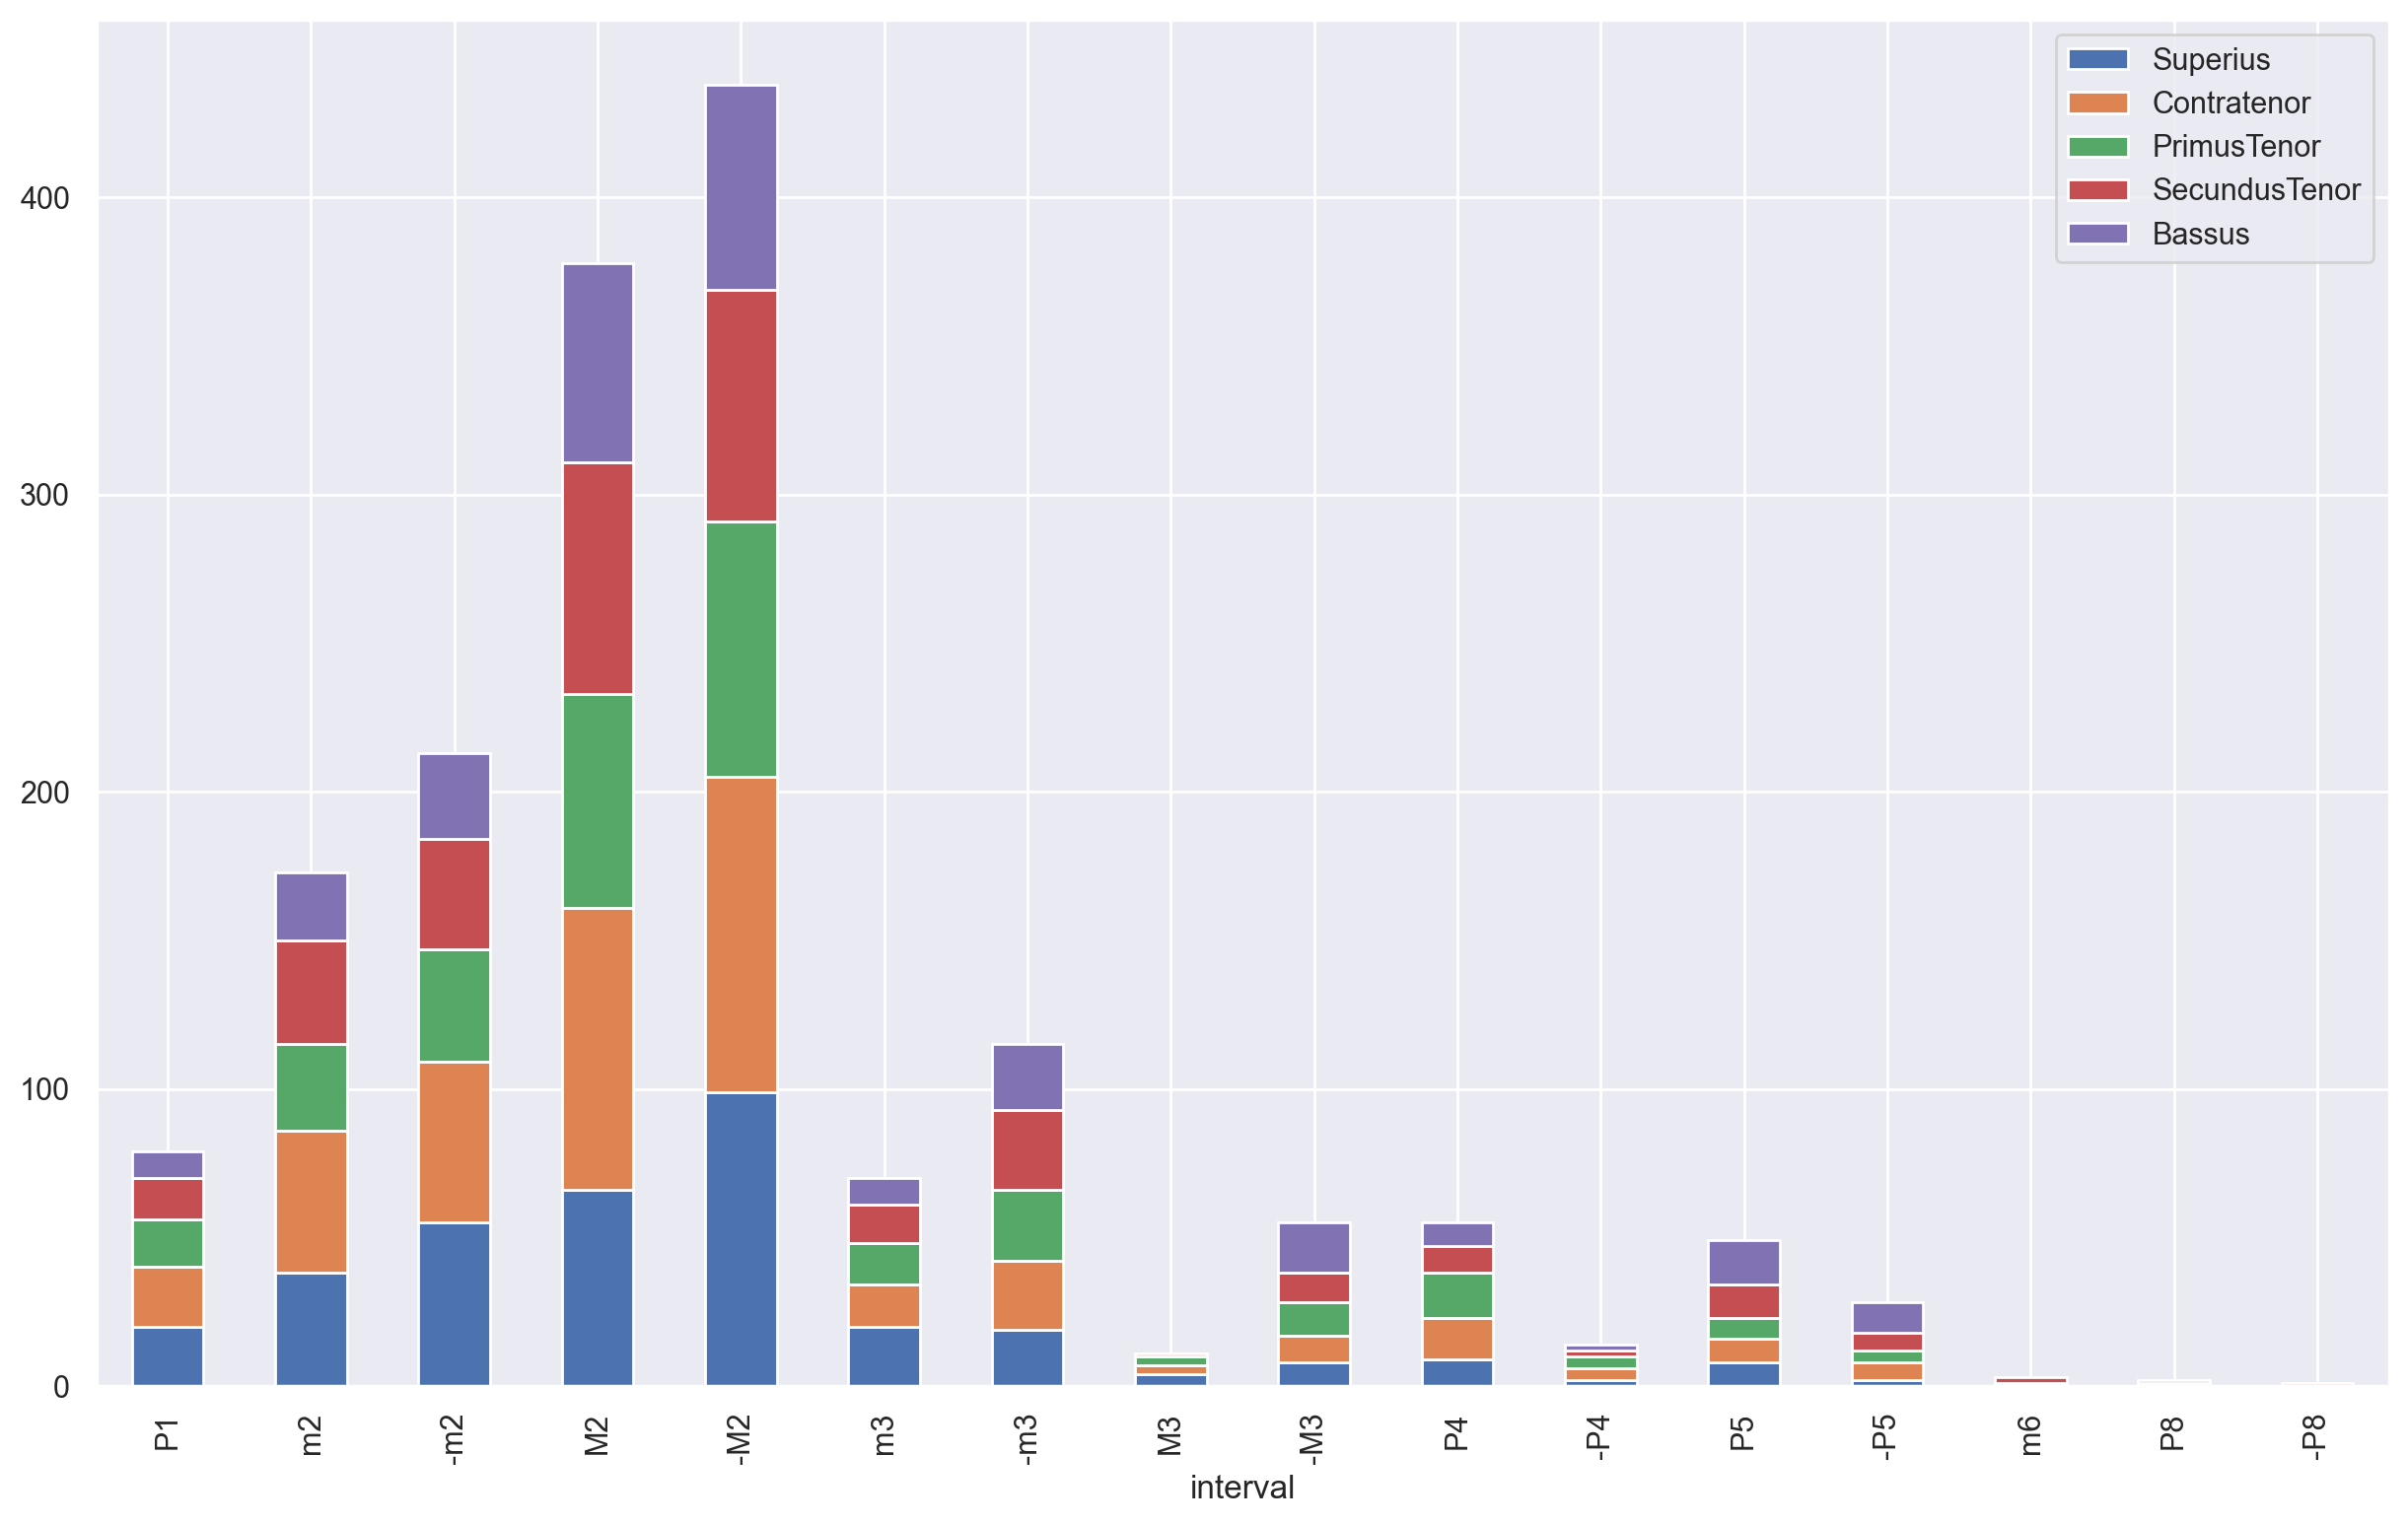

In [7]:
%matplotlib inline
int_order = ["P1", "m2", "-m2", "M2", "-M2", "m3", "-m3", "M3", "-M3", "P4", "-P4", "P5", "-P5", 
             "m6", "-m6", "M6", "-M6", "m7", "-m7", "M7", "-M7", "P8", "-P8"]

mel = piece.melodic()
mel = mel.fillna("-")

# count up the values in each item column--sum for each pitch.  
# make a copy to be sure we don't mess up
mel = mel.apply(pd.Series.value_counts).fillna(0).astype(int).reset_index().copy()

# rename the index column to something more useful
mel.rename(columns = {'index':'interval'}, inplace = True)

# apply the categorical list and sort
mel['interval'] = pd.Categorical(mel["interval"], categories=int_order)
mel = mel.sort_values(by = "interval").dropna().copy()

voices = mel.columns.to_list()
palette = sns.husl_palette(len(voices), l=.4)
md = piece.metadata
for key, value in md.items():
    print(key, ':', value)
# print(voices)
sns.set(rc={'figure.figsize':(15,9)})
mel.set_index('interval').plot(kind='bar', stacked=True)


### C.2 Get Melodic nGrams
* **Ngrams** are used in linguistics (and other fields)--they are continuous strings of characters or events, and can help us find similar **soggetti** or even predict **presentation types**.
<br><br>
* CRIM Intervals can create **melodic** or **harmonic** nGrams.  These can be some **fixed length**, or up to the **maximum before the next rest**.  We set this length with the `n` (as in `n=4`; to use maximum length nGrams, use `n=-1` [negative one])
<br><br>
* To use the `ngrams` method, we "pass" the results of `piece.melodic()` or `piece.harmonic()` (see below) to it.  For instance we set the variable name `mel` = `piece.melodic(kind="d", compound=False)` , and then pass `mel` to the nGram method, for instance:  `piece.ngrams(df=mel, n=4)`  
<br>
* We could also combine these steps in a single line of code: 
    * `ngrams = piece.ngrams(df=piece.melodic(kind="d", compound=False), n=4)`
    
* **Moving Window** or **Limit to Entries**?

    * By default the melodic ngrams will be a **moving window** of whatever length 'n' is chosen.  So for n="4" we would see notes 1-4, 2-5, 3-6, etc as the results.  This is helpful if you would like to see all of the substrings in a melody.
    * But **Limit to Entries** can be useful if we only want ngrams that follow a rest or section break, as these are useful in finding key Presentation Types or other markers of 'segments' in the piece.  For this we use a mask: `mask = piece.entryMask()
result = ng[mask].dropna(how='all')`
    
   
* **No Unisons**?  
    * As noted above, we can use `combineUnisons=True` to remove repeated notes from nGrams.  See cell below.
    
* **Drop NULL (NaN) values**?
    * `dropna(how="all")` allows you to all rows (offsets) where all voices are silent (NaN in all parts)
    * `fillna('-')` allows you to fill NaNs will any character
    
* **Read the documentation**:  `print(piece.ngrams.__doc__)`

In [8]:
mel = piece.melodic(kind="d")
ng = piece.ngrams(df=mel, n=5)
ng

,Superius,Contratenor,PrimusTenor,SecundusTenor,Bassus
4.0,"(5, -2, 2, 3, -2)",NaN,NaN,NaN,NaN
10.0,"(-2, 2, 3, -2, -2)",NaN,NaN,NaN,NaN
12.0,"(2, 3, -2, -2, -2)",NaN,NaN,NaN,NaN
14.0,"(3, -2, -2, -2, -3)",NaN,NaN,NaN,NaN
16.0,"(-2, -2, -2, -3, 2)","(4, -2, 2, 3, -2)",NaN,NaN,NaN
...,...,...,...,...,...
1058.0,NaN,"(-2, 2, -2, -2, -2)",NaN,"(-2, 2, 3, -2, -2)",NaN
1060.0,NaN,"(2, -2, -2, -2, 4)",NaN,"(2, 3, -2, -2, -2)","(-5, 2, 2, 2, 2)"
1063.0,NaN,"(-2, -2, -2, 4, -2)",NaN,NaN,"(2, 2, 2, 2, -3)"
1064.0,NaN,NaN,NaN,NaN,"(2, 2, 2, -3, -3)"


In [9]:
pd.options.display.max_rows = 999

In [10]:
nr = piece.notes(combineUnisons=True)
mel = piece.melodic(df=nr, kind='d', end=False)
ng = piece.ngrams(df=mel, n=4)
ng

,Superius,Contratenor,PrimusTenor,SecundusTenor,Bassus
0.0,"(5, -2, 2, 3)",NaN,NaN,NaN,NaN
4.0,"(-2, 2, 3, -2)",NaN,NaN,NaN,NaN
10.0,"(2, 3, -2, -2)",NaN,NaN,NaN,NaN
12.0,"(3, -2, -2, -2)","(4, -2, 2, 3)",NaN,NaN,NaN
14.0,"(-2, -2, -2, -3)",NaN,NaN,NaN,NaN
16.0,"(-2, -2, -3, 2)","(-2, 2, 3, -2)",NaN,NaN,NaN
18.0,"(-2, -3, 2, 3)",NaN,NaN,NaN,NaN
21.0,"(-3, 2, 3, -2)",NaN,NaN,NaN,NaN
22.0,"(2, 3, -2, -2)","(2, 3, -2, -2)",NaN,NaN,NaN
24.0,"(3, -2, -2, -2)","(3, -2, -2, -2)",NaN,NaN,NaN


In [11]:
piece.ngrams(interval_settings='d')

,Bassus_SecundusTenor,Bassus_PrimusTenor,Bassus_Contratenor,Bassus_Superius,SecundusTenor_PrimusTenor,SecundusTenor_Contratenor,SecundusTenor_Superius,PrimusTenor_Contratenor,PrimusTenor_Superius,Contratenor_Superius
12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"8_Held, 10_4, 6"
14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"10_4, 6_Held, 5"
16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"6_Held, 5_Held, 4"
18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"5_Held, 4_-2, 3"
21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"4_-2, 3_2, 3"
22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"3_2, 3_3, 3"
24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"3_3, 3_-2, 3"
26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"3_-2, 3_-2, 3"
28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"3_-2, 3_-2, 4"
30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"3_-2, 4_-3, 5"


In [12]:
nr = piece.notes(combineUnisons=True)
mel = piece.melodic(df=nr, kind='d', end=False)
ng = piece.ngrams(df=mel, n=4)
mask = piece.entryMask()
result = ng[mask].dropna(how='all')
result.head(20)


,Superius,Contratenor,PrimusTenor,SecundusTenor,Bassus
0.0,"(5, -2, 2, 3)",NaN,NaN,NaN,NaN
12.0,NaN,"(4, -2, 2, 3)",NaN,NaN,NaN
32.0,NaN,NaN,"(5, -2, 2, 3)",NaN,NaN
44.0,NaN,NaN,NaN,NaN,"(4, -2, 2, 3)"
66.0,NaN,NaN,NaN,"(5, -2, 2, 3)",NaN
72.0,"(5, -2, 2, 3)",NaN,NaN,NaN,NaN
86.0,NaN,NaN,"(2, -2, 2, 2)",NaN,NaN
90.0,NaN,NaN,NaN,"(2, 2, -3, 4)",NaN
94.0,NaN,NaN,NaN,NaN,"(-3, 2, 2, -2)"
118.0,"(-3, 2, 2, 3)",NaN,NaN,NaN,NaN



We can also display **measure+beat addresses**

*  The results of the previous **ngram** method are now 'passed' to the **detailIndex** method

In [13]:
piece.detailIndex(df=result, offset=True, beat=False)

Superius       Contratenor      PrimusTenor  \
Measure Offset                                                       
1       0.0       (5, -2, 2, 3)               NaN              NaN   
2       12.0                NaN     (4, -2, 2, 3)              NaN   
5       32.0                NaN               NaN    (5, -2, 2, 3)   
6       44.0                NaN               NaN              NaN   
9       66.0                NaN               NaN              NaN   
10      72.0      (5, -2, 2, 3)               NaN              NaN   
11      86.0                NaN               NaN    (2, -2, 2, 2)   
12      90.0                NaN               NaN              NaN   
        94.0                NaN               NaN              NaN   
15      118.0     (-3, 2, 2, 3)               NaN              NaN   
16      126.0               NaN               NaN              NaN   
18      138.0               NaN               NaN   (-2, -3, 2, 2)   
        142.0               NaN               NaN              NaN   
19      150.0               NaN               NaN              NaN   
20      158.0               NaN    (-2, -3, 2, 2)              NaN   
21      162.0    (-2, -3, 2, 2)               NaN              NaN   
        166.0               NaN               NaN              NaN   
22      174.0               NaN               NaN              NaN   
24      186.0               NaN               NaN   (-2, -3, 2, 2)   
        190.0               NaN               NaN              NaN   
25      198.0               NaN               NaN              NaN   
27      214.0               NaN               NaN    (2, -2, 2, 2)   
29      226.0               NaN               NaN    (5, -2, 2, 3)   
30      236.0               NaN               NaN              NaN   
31      242.0     (5, -2, 2, 3)               NaN              NaN   
        244.0               NaN               NaN              NaN   
32      254.0               NaN  (-2, -2, -2, -2)              NaN   
34      270.0               NaN     (5, -2, 2, 3)              NaN   
35      274.0     (4, -2, 2, 3)               NaN              NaN   
37      290.0               NaN               NaN    (4, -2, 2, 3)   
40      314.0               NaN               NaN              NaN   
        318.0               NaN    (3, -2, -2, 4)              NaN   
41      322.0     (2, -3, 2, 3)               NaN              NaN   
        324.0               NaN               NaN    (2, -3, 2, 4)   
42      330.0               NaN               NaN              NaN   
43      338.0               NaN               NaN              NaN   
        342.0               NaN     (2, -3, 2, 3)              NaN   
44      350.0               NaN               NaN    (2, -3, 2, 4)   
45      354.0     (2, -3, 2, 3)               NaN              NaN   
46      362.0               NaN               NaN              NaN   
48      378.0               NaN   (-2, -2, -2, 2)              NaN   
        382.0               NaN               NaN  (-2, -2, -2, 5)   
49      384.0               NaN               NaN              NaN   
50      394.0               NaN               NaN              NaN   
51      400.0    (2, 3, -2, -2)               NaN              NaN   
        406.0               NaN               NaN   (3, 2, -3, -2)   
52      410.0               NaN     (3, 2, -4, 2)              NaN   
53      418.0               NaN               NaN              NaN   
54      428.0               NaN               NaN              NaN   
        430.0               NaN               NaN   (4, -2, 2, -2)   
55      434.0               NaN    (4, -2, 2, -2)              NaN   
56      442.0    (4, -2, 2, -2)               NaN              NaN   
        446.0               NaN               NaN              NaN   
58      458.0               NaN               NaN              NaN   
        462.0               NaN               NaN   (4, -2, 2, -2)   
60      478.0               NaN  

### C.3 How Many nGrams?

* Pandas includes many **built-in methods** that make it simple to summarize and explore data
<br>

* `value_counts()` tells us how many of each nGram in each voice:  `ngrams.value_counts().to_frame()`
    
<br>

* `stack()` combines all the voices into one column, so we can see the nGrams of the piece in one view: 
`ngrams.stack().value_counts().to_frame()`

In [14]:
ng.value_counts().to_frame()

,,,,,0
Superius,Contratenor,PrimusTenor,SecundusTenor,Bassus,
"(2, 2, -2, -2)","(-2, -2, 4, -2)","(-3, -2, 2, 2)","(-2, -3, 2, 2)","(2, 2, -3, -2)",1


In [15]:
ng.stack().value_counts().to_frame()

,0
"(-2, -2, -2, 2)",59
"(2, -2, -2, -2)",56
"(-2, -2, -2, -2)",50
"(2, 2, 2, 2)",47
"(-2, -2, 2, 2)",41
"(2, 2, -2, -2)",38
"(3, -2, -2, -2)",37
"(2, 2, 2, -2)",31
"(-2, -3, 2, 2)",31
"(-2, 2, 2, 2)",26


### C.4 Search for Melodic nGrams

*  Here we can use Python tools to **search for any given 'string' of intervals**, and highlight them in the resulting data frame.
<br>

    * Note that we can also search at any given **constant time unit** (such as every 2 offsets = half note)
    * To do this we just add `unit=n` to the `getNgrams` request
    * We can also select to display as offsets or measures/beats
    
<br>

* Use the boxes below to **interact** with the code without needing to write it!
    * `search_pattern` returns any nGram with the interval sequence you use.  Include comma and space after each interval.
    * `kind` selects **quality**, **diatonic**, **chromatic**, or **zero**
    * `compound` will be **true** or **false**
    * `length` is the **length** of the `nGram` (three intervals is of course four notes); use `-1` for maximum length before any given rest.
    * `style` determines whether the results are listed by **offset** or **measure + beat**
    * `endpoint` determines whether the offset (or measure + beat) represents **first note** of the pattern or the **last**.  

<br>

* Sample search for **Model_0008**:  `4, 1, 2, 2, -3`  (use `kind="d"` and `length=5`)

<br>
    * Notice the regular time intervals between identical nGrams--the **classifier** can use this to predict presentation types.

In [16]:
nr = piece.notes(combineUnisons=True)

In [17]:
def convertTuple(tup):
    out = ""
    if isinstance(tup, tuple):
        out = ', '.join(tup)
    return out
@interact
def get_ngrams(search_pattern="", kind=["d", "q", "c", "z"], unisons=[False, True], compound=[True, False], length=[2, 3, 4, 5, 6], endpoint=["first", "last"]):
    nr = piece.notes(combineUnisons=unisons)
    ngrams = piece.ngrams(df=piece.melodic(df=nr, kind=kind), n=length, offsets=endpoint)
    ngrams = ngrams.applymap(convertTuple)
    mask = ngrams.apply(lambda x: x.apply(str).str.contains(search_pattern).any(), axis=1)

    filtered_ngrams = ngrams[mask].copy()
    filtered_ngrams.astype(str).copy
    
    beats_measures_mel = piece.detailIndex(filtered_ngrams, offset=True)

    return beats_measures_mel.fillna("-").applymap(str).style.applymap(lambda x: "background: #ccebc5" if re.search(search_pattern, x) else "")

    

interactive(children=(Text(value='', description='search_pattern'), Dropdown(description='kind', options=('d',…

## D. Harmonic Intervals and nGrams

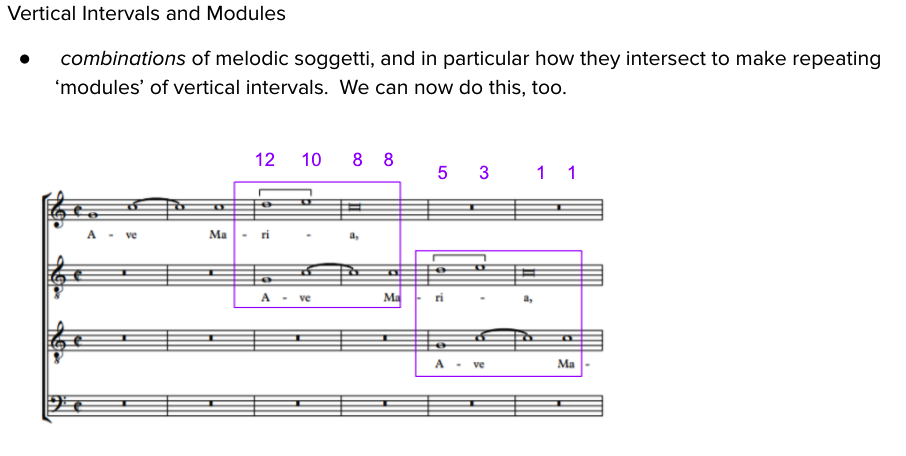

In [18]:
# Read the Documentation:  
print(ImportedPiece.harmonic.__doc__)


        Return harmonic intervals for all voice pairs. The voice pairs are
        named with the voice that's lower on the staff given first, and the two
        voices separated with an underscore, e.g. "Bassus_Tenor".

        :param str kind: use "q" (default) for diatonic intervals with quality,
            "d" for diatonic intervals without quality, "z" for zero-indexed
            diatonic intervals without quality (i.e. unison = 0, second = 1,
            etc.), or "c" for chromatic intervals. Only the first character is
            used, and it's case insensitive.
        :param bool directed: defaults to True which shows that the voice that
            is lower on the staff is a higher pitch than the voice that is
            higher on the staff. This is desginated with a "-" prefix.
        :param bool compound: whether to use compound (True, default) or simple
            (False) intervals. In the case of simple diatonic intervals, it
            simplifies to within the o

### D.1 Harmonic Intervals

* Specify **kind** as above (`q`, `d`, `c`, `z`)
* Choose **compound** (`=True`) or **simple** (`=False`)
* For example:  **`piece.harmonic(kind="d", compound=True)`**

**Drop NULL (NaN) values?**

* dropna(how="all") allows you to all rows (offsets) where all voices are silent (NaN in all parts)
fillna('-') allows you to fill NaNs will any character
* For example:  **`piece.harmonic(kind="d", compound=True).fillna('-')`**


In [19]:
harm = piece.harmonic(kind="d", compound=False).fillna("")
piece.detailIndex(harm, offset=True)


Bassus_SecundusTenor Bassus_PrimusTenor  \
Measure Beat Offset                                           
1       1.00 0.0                    Rest               Rest   
        3.00 4.0                                              
2       2.00 10.0                                             
        3.00 8.0                    Rest               Rest   
             12.0                                             
        4.00 14.0                                             
3       1.00 16.0                   Rest               Rest   
        2.00 18.0                                             
        3.50 21.0                                             
        4.00 22.0                                             
4       1.00 24.0                   Rest               Rest   
        2.00 26.0                                             
        3.00 28.0                                             
        4.00 30.0                                             
5       1.00 32.0                   Rest               Rest   
        1.50 33.0                                             
        2.00 34.0                                             
        2.50 35.0                                             
        3.00 36.0                                      Rest   
        3.50 37.0                                             
        4.00 38.0                                             
6       1.00 40.0                   Rest               Rest   
        1.50 41.0                                             
        2.00 42.0                                      Rest   
        3.00 44.0                   Rest                  8   
        4.00 46.0                                         3   
7       1.00 48.0                   Rest                  6   
        2.00 50.0                                         5   
        2.50 51.0                                             
        3.00 52.0                                             
        3.50 53.0                                         4   
        4.00 54.0                   Rest                  3   
8       1.00 56.0                   Rest                  3   
        2.00 58.0                   Rest                  3   
        3.00 60.0                   Rest                  4   
        4.00 62.0                                         3   
        4.50 63.0                   Rest                  4   
9       1.00 64.0                   Rest                  6   
        2.00 66.0                      3                  6   
        2.50 67.0                                         5   
        3.00 68.0                      6                  3   
        4.00 70.0                      5                  3   
10      1.00 72.0                      7                  3   
        2.00 74.0                      6                      
        2.50 75.0                                             
        3.00 76.0                      8                  5   
        3.50 77.0                      7                  4   
        4.00 78.0                      6                  3   
        4.50 79.0                      7                  2   
11      1.00 80.0                      5                  1   
        1.50 81.0                      4                 -2   
        2.00 82.0                      3                 -3   
        3.00 84.0                      2               Rest   
        3.50 85.0                      3               Rest   
        3.75 85.5                      4               Rest   
        4.00 86.0                      3                  3   
        4.50 87.0                                             
12      1.00 88.0                   Rest                  3   
        1.50 89.0                                         2   
        2.00 90.0                     -3                  3   
        2.50 91.0                                         4   
        3.00 92.0                   Rest           

### D.2 Harmonic NGrams

* **Ngrams** are used in linguistics (and other fields)--they are continuous strings of characters or events, and can help us find similar **soggetti** or even predict **presentation types**.
<br><br>
* CRIM Intervals can create **harmonic** nGrams.  These can be some **fixed length**, or up to the **maximum before the next rest**.  We set this length with the `n` (as in `n=4`; to use maximum length nGrams, use `n=-1` [negative one])
<br><br>
* To use the `ngrams` method, we "pass" the results of `piece.harmonic()` to it.  For instance we set the variable name `har` = `piece.harmonic(kind="d", compound=False)` , and then pass `har` to the nGram method.
* For instance:  `piece.ngrams(df=har, n=4)`  
<br>
* We could also combine these steps in a single line of code: 
    * `ngrams = piece.ngrams(df=piece.harmonic(kind="d", compound=False), n=4)`
   
* No Unisons?  
    * As noted above, we can use `combineUnisons=True` to remove repeated notes from nGrams.  See cell below.
    
* Drop NULL (NaN) values?
    * `dropna(how="all")` allows you to all rows (offsets) where all voices are silent (NaN in all parts)
    * `fillna('-')` allows you to fill NaNs will any character
* Real Durations or Sampled at Fixed Value?
    * By default the ngrams will follow the real durations of the melody.  But it is also possible to **sample by any durational increment**.  For instance `piece.ngrams(unit='2')` will return ngrams based on every half-note (semibreve)

In [20]:
har = piece.harmonic(kind="d", compound=True)
piece.ngrams(df=har, n=4).fillna('-')

,Bassus_SecundusTenor,Bassus_PrimusTenor,Bassus_Contratenor,Bassus_Superius,SecundusTenor_PrimusTenor,SecundusTenor_Contratenor,SecundusTenor_Superius,PrimusTenor_Contratenor,PrimusTenor_Superius,Contratenor_Superius
12.0,-,-,-,-,-,-,-,-,-,"(8, 10, 6, 5)"
14.0,-,-,-,-,-,-,-,-,-,"(10, 6, 5, 4)"
16.0,-,-,-,-,-,-,-,-,-,"(6, 5, 4, 3)"
18.0,-,-,-,-,-,-,-,-,-,"(5, 4, 3, 3)"
21.0,-,-,-,-,-,-,-,-,-,"(4, 3, 3, 3)"
22.0,-,-,-,-,-,-,-,-,-,"(3, 3, 3, 3)"
24.0,-,-,-,-,-,-,-,-,-,"(3, 3, 3, 3)"
26.0,-,-,-,-,-,-,-,-,-,"(3, 3, 3, 4)"
28.0,-,-,-,-,-,-,-,-,-,"(3, 3, 4, 5)"
30.0,-,-,-,-,-,-,-,-,-,"(3, 4, 5, 3)"


### D.3  Search Harmonic nGrams


* See Section **C.4** for explanation of the interactive search.
<br>

* Examples:
<br>

* Two patterns: `12, 10, 8, 8|5, 3, 1, 1`
<br>

* Authentic cadence with 6>8 or 3>1 motion:  `7, 6, 8|2, 3, 1`
 <br>
 
* Plagal cadence:  `6, 6, 6` at the same time we also see `5, 3, 5` in another pair of voices.  Currently it is not possible to search for both at the same time.


In [21]:
def convertTuple(tup):
    out = ""
    if isinstance(tup, tuple):
        out = ', '.join(tup)
    return out
@interact
def get_ngrams(search_pattern="", kind=["d", "q", "c", "z"], compound=[True, False], length=[2, 3, 4, 5, 6], endpoint=["first", "last"]):
    ngrams = piece.ngrams(df=piece.harmonic(kind=kind, compound=compound), n=length, offsets=endpoint)
    ngrams = ngrams.applymap(convertTuple)
    mask = ngrams.apply(lambda x: x.apply(str).str.contains(search_pattern).any(), axis=1)

    filtered_ngrams = ngrams[mask].copy()
    filtered_ngrams.astype(str).copy
    
    beats_measures_har = piece.detailIndex(filtered_ngrams, offset=True)

    return beats_measures_har.fillna("-").applymap(str).style.applymap(lambda x: "background: #ccebc5" if re.search(search_pattern, x) else "")

      

interactive(children=(Text(value='', description='search_pattern'), Dropdown(description='kind', options=('d',…

## E. Corpus Inventory

* The **CorpusBase** class is a convenient way to find patterns in any given list of pieces.
* The pieces are provided as a **list**, within square brackets and separated by commas.  
* The bracketed list is then contained within the parentheses of `CorpusBase()`
* For example: first make a list:


       ['https://crimproject.org/mei/CRIM_Mass_0006_1.mei',
       'https://crimproject.org/mei/CRIM_Mass_0006_2.mei',
       'https://crimproject.org/mei/CRIM_Mass_0006_3.mei']
       
* And then put that list in parentheses:

        corpus = CorpusBase(PUT THE LIST HERE)
       
* Result:

        corpus = CorpusBase(['https://crimproject.org/mei/CRIM_Mass_0006_1.mei',
       'https://crimproject.org/mei/CRIM_Mass_0006_2.mei',
       'https://crimproject.org/mei/CRIM_Mass_0006_3.mei'])
     

     
* Read the documentation:  `print(CorpusBase.batch.__doc__)`

* For a corpus in `'Music_Files'` we can make a list of the files found in that folder.

        `corpus_list = []
        for name in glob.glob('Music_Files/*'):
            corpus_list.append(name)
        corpus_list`

* We then pass this list to `CorpusBase`:

        `corpus = CorpusBase(corpus_list)`


In [10]:
# Read the Documentation:  
print(CorpusBase.batch.__doc__)


        Run the `func` on each of the scores in this CorpusBase object and
        return a list of the results. `func` should be a method from the
        ImportedPiece class. If you need to pass arguments to that function,
        pass them as a dictionary of keyword arguments with the kwargs
        parameter. These parameters will be the same for each ImportedPiece
        object as it gets the `func` applied to its score.

        # Example of basic analysis with no added parameters:
        corpus = CorpusBase(['https://crimproject.org/mei/CRIM_Mass_0014_3.mei',
                             'https://crimproject.org/mei/CRIM_Model_0009.mei'])
        func = ImportedPiece.notes  # <- NB there are no parentheses here
        list_of_dfs = corpus.batch(func)

        # Example passing some parameters to `func` calls. Note that you only add
        # the parameters to kwargs that you need to pass. This example returns a
        # list of dataframes of the melodic intervals of each pi

#### E.1  Corpus Melodic Inventory

*  Get the `ngrams` for all of them.  
*  In this case:  modules of length "3", with diatonic
*  Then combine them into one frame

* NB: use `ImportedPiece`, not `piece`!
* NB:  `func1` and `func2` do **NOT** include the closing parentheses!

    - `func1 = ImportedPiece.melodic`
    - `list_of_dfs = corpus.batch(func=func1, kwargs={'kind': 'd', 'end': False}, metadata=False)`
    - `func2 = ImportedPiece.ngrams`
    - `list_of_melodic_ngrams = corpus.batch(func=func2, kwargs={'n': 4, 'df': list_of_dfs}, metadata=True)`

    - `title_of_output = pd.concat(list_of_melodic_ngrams)`



In [2]:
#  first the list of pieces
corpus = CorpusBase(['https://crimproject.org/mei/CRIM_Mass_0050_1.mei',
                     'https://crimproject.org/mei/CRIM_Mass_0050_2.mei',
                     'https://crimproject.org/mei/CRIM_Mass_0050_3.mei',
                     'https://crimproject.org/mei/CRIM_Mass_0050_4.mei',
                     'https://crimproject.org/mei/CRIM_Mass_0050_5.mei'
                     ])

Successfully imported https://crimproject.org/mei/CRIM_Mass_0050_1.mei
Successfully imported https://crimproject.org/mei/CRIM_Mass_0050_2.mei
Successfully imported https://crimproject.org/mei/CRIM_Mass_0050_3.mei
Successfully imported https://crimproject.org/mei/CRIM_Mass_0050_4.mei
Successfully imported https://crimproject.org/mei/CRIM_Mass_0050_5.mei


In [11]:
# to load pieces from 'Music_Files'
piece_list = []
for name in glob.glob('Music_Files/*'):
    piece_list.append(name)
corpus = CorpusBase(piece_list)

Successfully imported Music_Files/Plaine_1597_131_9.musicxml
Successfully imported Music_Files/Plaine_1597_131_8.musicxml
Successfully imported Music_Files/Plaine_1597_131_3.musicxml
Successfully imported Music_Files/Plaine_1597_131_2.musicxml
Successfully imported Music_Files/Plaine_1597_127_5.musicxml
Successfully imported Music_Files/Plaine_1597_127_4.musicxml
Successfully imported Music_Files/Plaine_1597_128_3.musicxml
Successfully imported Music_Files/Plaine_1597_128_2.musicxml
Successfully imported Music_Files/Plaine_1597_128_8.musicxml
Successfully imported Music_Files/Plaine_1597_129_1.musicxml
Successfully imported Music_Files/Plaine_1597_128_4.musicxml
Successfully imported Music_Files/Plaine_1597_128_5.musicxml
Successfully imported Music_Files/Plaine_1597_129_6.musicxml
Successfully imported Music_Files/Plaine_1597_127_8.musicxml
Successfully imported Music_Files/Plaine_1597_131_4.musicxml
Successfully imported Music_Files/Plaine_1597_131_5.musicxml
Successfully imported Mu

### Corpus Results for Melodic Ngrams

In [4]:

func1 = ImportedPiece.melodic
list_of_dfs = corpus.batch(func=func1, kwargs={'kind': 'd', 'end': False}, metadata=False)
func2 = ImportedPiece.ngrams
list_of_melodic_ngrams = corpus.batch(func=func2, kwargs={'n': 3, 'df': list_of_dfs}, metadata=False)
func3 = ImportedPiece.detailIndex
list_of_detail_index = corpus.batch(func=func3, kwargs={'offset': False,'df': list_of_melodic_ngrams}, metadata=True)

mel_corpus = pd.concat(list_of_detail_index)
comp = mel_corpus.pop("Composer")
mel_corpus['Composer'] = comp
title = mel_corpus.pop("Title")
mel_corpus["Title"] = title
mel_corpus = mel_corpus.fillna('-')


In [6]:
mel_corpus

1            2            3             4             5  \
Measure Beat                                                                    
1       1.0           -  (-3, -3, 5)            -             -             -   
        3.0   (3, 2, 2)   (-3, 5, 2)            -             -             -   
        4.0           -    (5, 2, 2)            -             -             -   
2       1.0   (2, 2, 1)            -            -             -             -   
        2.0           -            -  (-3, -3, 5)             -             -   
...                 ...          ...          ...           ...           ...   
52      4.0   (2, 2, 2)            -            -   (-4, 5, -2)  (-2, -2, -2)   
53      1.0           -  (-3, -2, 2)            -   (5, -2, -2)             -   
        1.5   (2, 2, 2)            -            -             -             -   
        2.0   (2, 2, 1)            -            -  (-2, -2, -2)             -   
        3.5           -            -            -   (-2, -2, 2)             -   

              6        Composer                           Title  
Measure Beat                                                     
1       1.0   -  Claudio Merulo    Missa Susanne un jour: Kyrie  
        3.0   -  Claudio Merulo    Missa Susanne un jour: Kyrie  
        4.0   -  Claudio Merulo    Missa Susanne un jour: Kyrie  
2       1.0   -  Claudio Merulo    Missa Susanne un jour: Kyrie  
        2.0   -  Claudio Merulo    Missa Susanne un jour: Kyrie  
...          ..             ...                             ...  
52      4.0   -  Claudio Merulo  Missa Susanne un jour: Sanctus  
53      1.0   -  Claudio Merulo  Missa Susanne un jour: Sanctus  
        1.5   -  Claudio Merulo  Missa Susanne un jour: Sanctus  
        2.0   -  Claudio Merulo  Missa Susanne un jour: Sanctus  
        3.5   -  Claudio Merulo  Missa Susanne un jour: Sanctus  

[2329 rows x 8 columns]

In [30]:
mel_corpus.to_csv('saved_csv/riquet_soggetti.csv')

## Search The Corpus for a Particular Melodic NGram String

Note that the 'output' much match the name of the combined results created above

In [48]:

def convertTuple(tup):
    out = ""
    if isinstance(tup, tuple):
        out = ', '.join(tup)
    return out

@interact
def mel_ngram_search(my_search="", df = fixed(mel_corpus)):
    df_no_tuple = df.applymap(convertTuple)
    df_no_tuple.pop("Composer")
    df_no_tuple.pop("Title")
    df_no_tuple.insert(0, "Composer", df["Composer"])
    df_no_tuple.insert(1, "Title", df["Title"])
    filtered_ngrams = df_no_tuple[df_no_tuple.apply(lambda x: x.astype(str).str.contains(my_search).any(), axis=1)].copy()
    
    pd.set_option('max_columns', None)
    return filtered_ngrams.fillna("-").reset_index().applymap(str).style.applymap(lambda x: "background: #ccebc4" if re.search(my_search, x) else "")

interactive(children=(Text(value='', description='my_search'), Output()), _dom_classes=('widget-interact',))

## List Harmonic nGrams for Corpus


In [75]:
def convertTuple(tup):
    out = ""
    if isinstance(tup, tuple):
        out = ', '.join(tup)
    return out
func1 = ImportedPiece.harmonic
list_of_dfs = corpus.batch(func=func1, kwargs={'kind': 'd'}, metadata=True)
func2 = ImportedPiece.ngrams
list_of_harmonic_ngrams = corpus.batch(func=func2, kwargs={'n': 4, 'df': list_of_dfs})
func3 = ImportedPiece.detailIndex
list_of_detail_index = corpus.batch(func=func3, kwargs={'offset':False,'df': list_of_harmonic_ngrams}, metadata=True)
cleaned_list = []
for df in list_of_detail_index:
    df_no_tuple = df.applymap(convertTuple)
    df_no_tuple["Composer"] = df["Composer"]
    df_no_tuple["Title"] = df["Title"] 
    cleaned_list.append(df_no_tuple)
har_corpus = pd.concat(cleaned_list)
har_corpus.sort_index(axis=1, inplace=True, ascending=False)
c = har_corpus.pop("Composer")
t = har_corpus.pop("Title")
har_corpus.insert(0, "Composer", c)
har_corpus.insert(1, "Title", t)

har_corpus

Composer                           Title  6_5         6_4  \
Measure Beat                                                                    
1       1.0   Claudio Merulo    Missa Susanne un jour: Kyrie  NaN         NaN   
        3.0   Claudio Merulo    Missa Susanne un jour: Kyrie  NaN         NaN   
        4.0   Claudio Merulo    Missa Susanne un jour: Kyrie  NaN         NaN   
2       1.0   Claudio Merulo    Missa Susanne un jour: Kyrie  NaN         NaN   
        2.0   Claudio Merulo    Missa Susanne un jour: Kyrie  NaN         NaN   
...                      ...                             ...  ...         ...   
53      1.5   Claudio Merulo  Missa Susanne un jour: Sanctus                    
        2.0   Claudio Merulo  Missa Susanne un jour: Sanctus       5, 8, 7, 6   
        2.5   Claudio Merulo  Missa Susanne un jour: Sanctus                    
        3.0   Claudio Merulo  Missa Susanne un jour: Sanctus       8, 7, 6, 5   
        3.5   Claudio Merulo  Missa Susanne un jour: Sanctus       7, 6, 5, 3   

              6_3           6_2             6_1         5_4 5_3         5_2  \
Measure Beat                                                                  
1       1.0   NaN           NaN             NaN                               
        3.0   NaN           NaN             NaN                               
        4.0   NaN           NaN             NaN                               
2       1.0   NaN           NaN             NaN                               
        2.0   NaN           NaN             NaN                               
...           ...           ...             ...         ...  ..         ...   
53      1.5                       9, 10, 11, 15                               
        2.0        8, 11, 10, 8  10, 11, 15, 12  3, 4, 3, 2      6, 7, 6, 8   
        2.5                                                                   
        3.0                                      4, 3, 2, 1                   
        3.5                                      3, 2, 1, 3                   

                       5_1             4_3         4_2            4_1  \
Measure Beat                                                            
1       1.0                                                             
        3.0                                                             
        4.0                                                             
2       1.0                                                             
        2.0                                                             
...                    ...             ...         ...            ...   
53      1.5    6, 8, 9, 11                                 9, 6, 7, 8   
        2.0   8, 9, 11, 12  -8, -7, -6, -5  4, 5, 6, 6     6, 7, 8, 9   
        2.5                                               7, 8, 9, 10   
        3.0                                              8, 9, 10, 11   
        3.5                 -7, -6, -5, -6  5, 6, 6, 6  9, 10, 11, 10   

                     3_2             3_1          2_1  
Measure Beat                                           
1       1.0                                            
        3.0                                3, 5, 3, 3  
        4.0                                5, 3, 3, 3  
2       1.0                                            
        2.0   1, 3, 6, 3      3, 5, 8, 5               
...                  ...             ...          ...  
53      1.5               12, 13, 14, 15  -2, 3, 4, 5  
        2.0               13, 14, 15, 15   3, 4, 5, 6  
        2.5                                4, 5, 6, 5  
        3.0                                            
        3.5                                            

[2439 rows x 17 columns]

In [78]:
## Search Corpus for Specific Harmonic NGrams

In [79]:
def convertTuple(tup):
    out = ""
    if isinstance(tup, tuple):
        out = ', '.join(tup)
    return out

@interact
def har_ngram_search(my_search="", df = fixed(har_corpus)):
    df2 = har_corpus.copy()
    filtered_ngrams = df2[df2.apply(lambda x: x.astype(str).str.contains(my_search).any(), axis=1)].copy()
    
    pd.set_option('max_columns', None)
    return filtered_ngrams.fillna("-").reset_index().applymap(str).style.applymap(lambda x: "background: #ccebc4" if re.search(my_search, x) else "")

interactive(children=(Text(value='', description='my_search'), Output()), _dom_classes=('widget-interact',))